# **Assignment 6**

Name: Rajat Goyal

Roll No: 197267

Section: B

1. Write a python program to implement Logistic Regression for multiclass     classification from scratch.
Link: https://www.kaggle.com/uciml/iris

In [ ]:
# Question 1
# Implementation of the Multiclass Classification Logistic Regression from Scratch
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

# PART A
df = pd.read_csv("Iris.csv")
df

Mounted at /content/drive


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# variable used
# Independent variable = All col - {Species} = X
# Dependent variable = target = Y

X, Y = df.drop(columns = ["Id", "Species"]), df['Species']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features : ",np.around(X,2))

for i in range(len(Y)):
  if Y.iat[i] == "Iris-setosa":
    Y.iat[i] = 0
  if Y.iat[i] == "Iris-versicolor":
    Y.iat[i] = 1
  if Y.iat[i] == "Iris-virginica":
    Y.iat[i] = 2
print("Dependent Feature : ",Y)

Independent Features :  [[-0.9   1.03 -1.34 -1.31]
 [-1.14 -0.12 -1.34 -1.31]
 [-1.39  0.34 -1.4  -1.31]
 [-1.51  0.11 -1.28 -1.31]
 [-1.02  1.26 -1.34 -1.31]
 [-0.54  1.96 -1.17 -1.05]
 [-1.51  0.8  -1.34 -1.18]
 [-1.02  0.8  -1.28 -1.31]
 [-1.75 -0.36 -1.34 -1.31]
 [-1.14  0.11 -1.28 -1.44]
 [-0.54  1.49 -1.28 -1.31]
 [-1.26  0.8  -1.23 -1.31]
 [-1.26 -0.12 -1.34 -1.44]
 [-1.87 -0.12 -1.51 -1.44]
 [-0.05  2.19 -1.46 -1.31]
 [-0.17  3.11 -1.28 -1.05]
 [-0.54  1.96 -1.4  -1.05]
 [-0.9   1.03 -1.34 -1.18]
 [-0.17  1.73 -1.17 -1.18]
 [-0.9   1.73 -1.28 -1.18]
 [-0.54  0.8  -1.17 -1.31]
 [-0.9   1.49 -1.28 -1.05]
 [-1.51  1.26 -1.57 -1.31]
 [-0.9   0.57 -1.17 -0.92]
 [-1.26  0.8  -1.06 -1.31]
 [-1.02 -0.12 -1.23 -1.31]
 [-1.02  0.8  -1.23 -1.05]
 [-0.78  1.03 -1.28 -1.31]
 [-0.78  0.8  -1.34 -1.31]
 [-1.39  0.34 -1.23 -1.31]
 [-1.26  0.11 -1.23 -1.31]
 [-0.54  0.8  -1.28 -1.05]
 [-0.78  2.42 -1.28 -1.44]
 [-0.42  2.65 -1.34 -1.31]
 [-1.14  0.11 -1.28 -1.44]
 [-1.02  0.34 -1.46 -1.31]
 [-0

In [ ]:
# Split a dataset into 80/20 train/test set
from random import randrange

def train_test_split(x, y, split):
  x_train, y_train = list(),list()
  train_size = split * len(x)
  x_test, y_test = list(x), list(y)
  while len(x_train) < train_size:
    idx = randrange(len(x_test))
    x_train.append(x_test.pop(idx))
    y_train.append(y_test.pop(idx))
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.8)

print("Independent Testing Feature :-\n",np.around(X_test,2))
print("Dependent Testing Feature :-\n",Y_test)

l = np.ones([len(X_train),1])
X_train = np.append(l, X_train, axis = 1)
l = np.ones([len(X_test),1])
X_test = np.append(l, X_test, axis = 1)

Independent Testing Feature :-
 [[-1.51  0.11 -1.28 -1.31]
 [-1.02  0.8  -1.28 -1.31]
 [-0.05  2.19 -1.46 -1.31]
 [-0.9   1.03 -1.34 -1.18]
 [-1.26  0.8  -1.06 -1.31]
 [-1.02  0.8  -1.23 -1.05]
 [-0.78  0.8  -1.34 -1.31]
 [-0.42  2.65 -1.34 -1.31]
 [-0.42  1.03 -1.4  -1.31]
 [-1.14  0.11 -1.28 -1.44]
 [-1.02  0.57 -1.34 -1.31]
 [ 0.67  0.34  0.42  0.4 ]
 [-0.42 -1.74  0.14  0.13]
 [ 0.8  -0.59  0.48  0.4 ]
 [ 0.07 -0.12  0.25  0.4 ]
 [ 0.07  0.34  0.59  0.79]
 [ 0.19 -0.36  0.42  0.4 ]
 [-0.05 -0.82  0.08  0.  ]
 [-0.54 -0.12  0.42  0.4 ]
 [-0.05 -1.05  0.14  0.  ]
 [-0.17 -0.59  0.19  0.13]
 [ 1.77 -0.36  1.45  0.79]
 [ 0.67 -0.82  0.88  0.92]
 [ 0.67  0.34  0.88  1.45]
 [ 2.25  1.73  1.67  1.32]
 [ 1.89 -0.59  1.33  0.92]
 [ 2.49  1.73  1.5   1.05]
 [ 0.67 -0.59  1.05  1.32]
 [ 0.55  0.8   1.05  1.58]
 [ 1.04  0.11  1.05  1.58]]
Dependent Testing Feature :-
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


In [ ]:
# Implement the logic of the algorithm using Gradient Descent Function

# Estimate linear regression coefficients using stochastic gradient descent

from math import exp

# Make a prediction with coefficients

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

def Gradient_Descent(x_train, y_train, alpha, epochs):
  y_train = y_train.reshape(len(y_train), 1)
  coef = np.zeros([len(x_train[0]),1])
  for e in range(epochs):
    cost = 0
    h_x = sigmoid(np.dot(x_train, coef))
    cost = np.sum(-(y_train * np.log(h_x) + (1 - y_train) * np.log(1 - h_x)))
    
    # Updating theta
    coef[0] = coef[0] - alpha * np.sum(h_x - y_train)
    for i in range(1,len(coef)):
      coef[i] = coef[i] - alpha * np.sum((h_x - y_train) * x_train[:,i].reshape(-1,1))
  return coef

# Finding coefficients
coef = []
epochs = 500
alpha = 0.01
y_train_unique = set(Y_train)

for i in y_train_unique:
  y_train_curr = np.where((Y_train == i), 1, 0)
  coef.append(Gradient_Descent(X_train, y_train_curr, alpha, epochs))
print(coef)

[array([[-3.16247871],
       [-1.49366339],
       [ 2.44316766],
       [-3.11740469],
       [-2.79042719]]), array([[-1.08185804],
       [ 0.27095284],
       [-1.29391156],
       [ 1.96658918],
       [-2.27416649]]), array([[-6.27259747],
       [-1.03049565],
       [-0.66241939],
       [ 4.80566264],
       [ 6.19257655]])]


In [ ]:
Y_pred = []
for i in range(len(X_test)):
  pred = 0
  for j in range(len(coef)):
    y = np.sum(sigmoid(np.dot(X_test[i], coef[j])))
    if y > pred:
      pred = y
      prediction = j
  Y_pred.append(prediction)

accuracy = 0

for i in range(len(Y_test)):
  if Y_test[i] == Y_pred[i]:
    accuracy += 1

print("Accuracy is", (accuracy / len(Y_test)) * 100)
print("Testing Data\t",Y_test)
print("Predicted Data\t",np.array(Y_pred))

Accuracy is 96.66666666666667
Testing Data	 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Predicted Data	 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


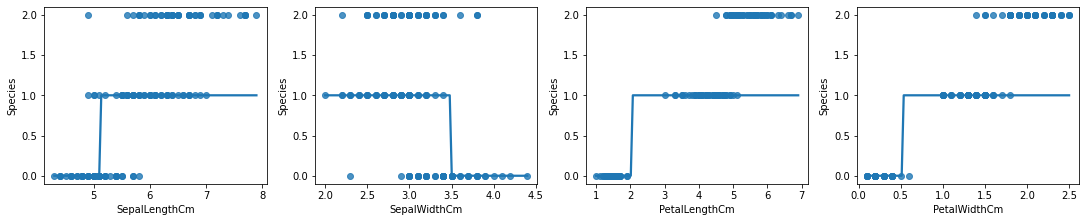

In [ ]:
# Train the model and plot the data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

col = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
x = df.drop('Species', axis = 1)
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize=(15, 3))
axs = axs.flatten()
for i,k in enumerate(col):
  sns.regplot(x = x[k], y = Y.astype(float),scatter= True, logistic = True, ci = None,ax = axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

2. Write a python program to implement Support Vector Machines (SVM) for Linear and Polynomial
kernel from scratch using the following dataset.
Link:
https://www.kaggle.com/uciml/iris [Iris dataset has three classes, remove any one of the
classes and use the dataset]

In [ ]:
# Question 2
# Implementation of the SVM from Scratch
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

# PART A
df = pd.read_csv("Iris.csv")
df

Mounted at /content/drive


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# variable used
# Independent variable = All col - {Species} = X
# Dependent variable = target = Y

X, Y = df.drop(columns = ["Id", "Species"]), df['Species']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features shape : ",X.shape)

for i in range(len(Y)):
  if Y.iat[i] == "Iris-setosa":
    Y.iat[i] = 0
  if Y.iat[i] == "Iris-versicolor":
    Y.iat[i] = 1
  if Y.iat[i] == "Iris-virginica":
    Y.iat[i] = 2
print("Dependent Feature shape : ",Y.shape)

Independent Features shape :  (150, 4)
Dependent Feature shape :  (150,)


In [ ]:
# Split a dataset into 80/20 train/test set
from random import randrange

def train_test_split(x, y, split):
  x_train, y_train = list(),list()
  train_size = split * len(x)
  x_test, y_test = list(x), list(y)
  while len(x_train) < train_size:
    idx = randrange(len(x_test))
    x_train.append(x_test.pop(idx))
    y_train.append(y_test.pop(idx))
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.8)

print("Independent Training Feature Shape :-",X_train.shape)
print("Independent Testing Feature Shape :-",X_test.shape)
print("Dependent Training Feature Shape :- ",Y_train.shape)
print("Dependent Testing Feature Shape :- ",Y_test.shape)

Independent Training Feature Shape :- (120, 4)
Independent Testing Feature Shape :- (30, 4)
Dependent Training Feature Shape :-  (120,)
Dependent Testing Feature Shape :-  (30,)


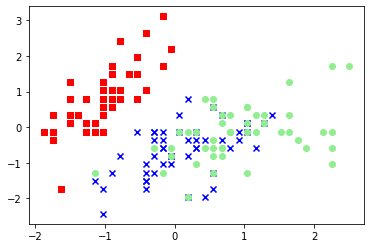

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x = X[Y == cl, 0], y = X[Y == cl, 1], marker = markers[idx],color = colors[idx], label = cl)

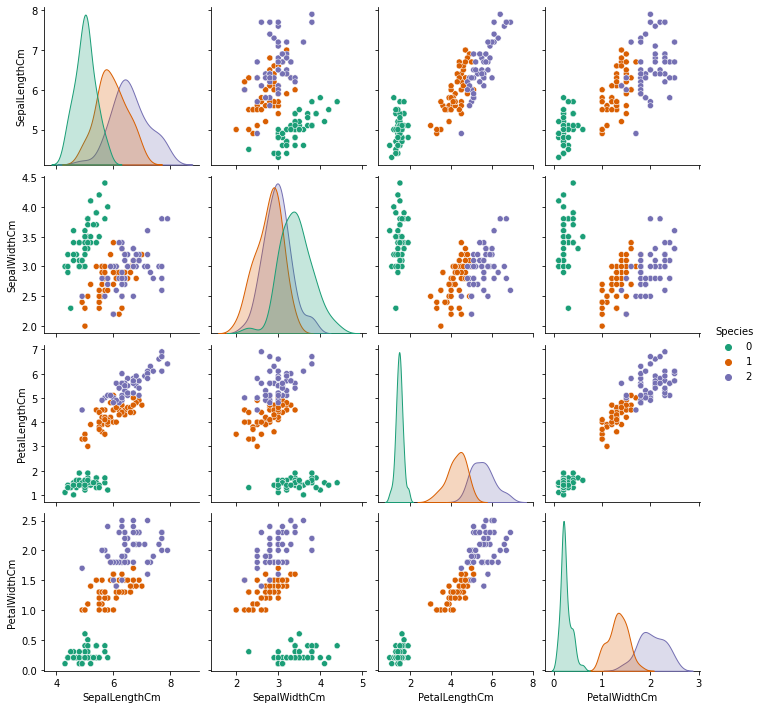

In [ ]:
# Setosa is the most separable.
import matplotlib.pyplot as plt
import seaborn as sns

df = df.drop("Id",axis = 1)
sns.pairplot(df, hue='Species',palette='Dark2')

In [ ]:
# Objective function
# For optimization
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize
import warnings
warnings.filterwarnings("ignore")

ZERO = 1e-7
def lagrange_dual(alpha, x, y):
    res = 0
    idx_sv = np.where(alpha > ZERO)[0]
    for i in idx_sv:
        for j in idx_sv:
            res = res + alpha[i]*alpha[j] * y[i]*y[j] * np.dot(x[i, :], x[j, :]) 
    res = 0.5*res - sum(alpha)     
    return res

def optimize_alpha(x, y):
    m, n = x.shape
    np.random.seed(1)
    # Initialize alphas to random values
    alpha_0 = np.random.rand(m)*100
    # Define the constraint
    linear_constraint = LinearConstraint(y, [0], [0])
    # Define the bounds
    bounds_alpha = Bounds(np.zeros(m), np.full(m, 1))

    # Find the optimal value of alpha
    res = minimize(lagrange_dual, alpha_0, args = (x, y), method='slsqp', 
                       hess=BFGS(), constraints=[linear_constraint],
                       bounds=bounds_alpha)
    
    # The optimized value of alpha lies in result.x
    alpha = res.x
    return alpha

def get_w(alpha, x, y):
    m = len(x)
    # Get all support vectors
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + alpha[i]*y[i]*x[i, :]        
    return w

def get_w0(alpha, x, y, w):
    C_num = 100-ZERO
    # Indices of support vectors with alpha<C
    idx_sv = np.where((alpha > ZERO)&(alpha < C_num))[0]
    w0 = 0.0
    for s in idx_sv:
        w0 = w0 + y[s] - np.dot(x[s, :], w)
    # Take the average
    l = len(idx_sv)
    if l == 0:
      l = 1
    w0 = w0 / l
    return w0

def prediction(x_test, w, w0):
    # get y(x_test)
    y_pred = np.sum(x_test*w, axis=1) + w0
    y_pred = np.sign(y_pred)
    # Assign a label arbitrarily a +1 if it is zero
    y_pred[y_pred == 0] = 1
    return y_pred

#find accuracy
def Accuracy(actual, predict):
  l = len(actual)
  accuracy = sum(actual == predict)
  return accuracy/l*100

def SVM(x_train, y_train, x_test, y_test):
  #get alpha
  alpha = optimize_alpha(x_train, y_train)
  
  #get theta
  w = get_w(alpha, x_train, y_train)
  w0 = get_w0(alpha, x_train, y_train, w)
  #get predicted value of y
  y_pred = prediction(x_test, w, w0)

  #get Accuracy
  accuracy = Accuracy(y_test, y_pred)
  return accuracy

y_train_unique = set(Y_train)
accuracy = 0.0

for i in y_train_unique:
  y_train_curr = np.where((Y_train == i), 1, -1)
  y_test_curr = np.where((Y_test == i), 1, -1)
  accuracy += SVM(X_train, y_train_curr, X_test, y_test_curr)

accuracy = accuracy/len(y_train_unique)
print("Accuracy :-",accuracy)


Accuracy :- 83.33333333333333
